In [19]:
import rasterio
from rasterio.plot import show
import numpy as np
from rasterio.plot import show
import geopandas as gp
import matplotlib.pyplot as plt

In [20]:
b4= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\liss3\L3_SAT_8B_V1_76.25E9.5N_C43Q06_24Jan08\l3c43q0624jan08\L3-NC43Q06-099-067-24jan08-BAND4.tif")
b3= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\liss3\L3_SAT_8B_V1_76.25E9.5N_C43Q06_24Jan08\l3c43q0624jan08\L3-NC43Q06-099-067-24jan08-BAND3.tif")
#.open is just openiing the connection ..it doesnt read in memory..just to display perpose
#.open is rasterio library

In [21]:
p4= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\liss3\L3_SAT_8B_V1_76.25E9.5N_C43Q06_24Jan08\l3c43q0624jan08\L3-NC43Q06-099-067-24jan08-BAND4.tif")
p3= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\liss3\L3_SAT_8B_V1_76.25E9.5N_C43Q06_24Jan08\l3c43q0624jan08\L3-NC43Q06-099-067-24jan08-BAND3.tif")

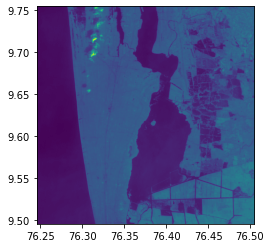

<AxesSubplot:>

In [22]:
b4
show(b4)

In [23]:
b4.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1153,
 'height': 1153,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.000225, 0.0, 76.2453875,
        0.0, -0.000225, 9.754612500000029)}

In [24]:
b3.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1153,
 'height': 1153,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.000225, 0.0, 76.2453875,
        0.0, -0.000225, 9.754612500000029)}

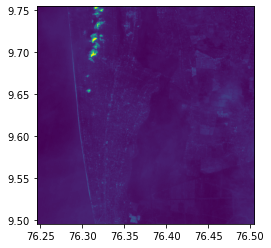

<AxesSubplot:>

In [25]:
show (b3)

In [26]:
b4c=b4.read().astype('float64')  #converting reaster layer to array
b4c                              #astype-->to convert array to floating point for accurate calculation.....
                                 #b4c is numpy array which extract the values from the raster image and store it in array

array([[[ 25.,  25.,  25., ..., 108., 108., 104.],
        [ 25.,  25.,  25., ...,  91.,  95.,  99.],
        [ 25.,  25.,  25., ...,  88.,  91.,  94.],
        ...,
        [ 32.,  32.,  32., ..., 103., 102., 103.],
        [ 32.,  32.,  32., ..., 104.,  99.,  97.],
        [ 32.,  32.,  32., ..., 103.,  93.,  88.]]])

In [27]:
b4c.meta  # array have no property of meta data 

AttributeError: 'numpy.ndarray' object has no attribute 'meta'

In [28]:
b3c=b3.read().astype('float64')  #.read create an array and extract and save the values in array
b3c                              #.read is not library of rasterio it is the common..no needd to call any library

array([[[44., 46., 47., ..., 57., 57., 57.],
        [45., 45., 46., ..., 61., 60., 61.],
        [45., 45., 46., ..., 61., 60., 66.],
        ...,
        [52., 52., 52., ..., 65., 66., 65.],
        [52., 52., 52., ..., 64., 65., 66.],
        [53., 52., 52., ..., 65., 66., 66.]]])

In [29]:
ndvi=(b4c-b3c)/(b4c+b3c)  #to calculate NDVI

In [30]:
ndvi     

array([[[-0.27536232, -0.29577465, -0.30555556, ...,  0.30909091,
          0.30909091,  0.29192547],
        [-0.28571429, -0.28571429, -0.29577465, ...,  0.19736842,
          0.22580645,  0.2375    ],
        [-0.28571429, -0.28571429, -0.29577465, ...,  0.18120805,
          0.20529801,  0.175     ],
        ...,
        [-0.23809524, -0.23809524, -0.23809524, ...,  0.22619048,
          0.21428571,  0.22619048],
        [-0.23809524, -0.23809524, -0.23809524, ...,  0.23809524,
          0.20731707,  0.19018405],
        [-0.24705882, -0.23809524, -0.23809524, ...,  0.22619048,
          0.16981132,  0.14285714]]])

In [31]:
ndvi_min=ndvi.min()   #range of NDVI
ndvi_max=ndvi.max()
ndvi_min,ndvi_max
#value is about -ve to +ve value)

(-0.35294117647058826, 0.49171270718232046)

In [32]:
show(ndvi)s=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\Data\LISS_3_Composite.tif")

SyntaxError: invalid syntax (121039797.py, line 1)

In [33]:
b4.shape

(1153, 1153)

In [34]:
#ndvi should save it in raster bcoz then only we can open in another softwre or to open the result..should save in tif format
ndvi_image= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA JUPTR_NB\anju\module_2b support\ndvi_res.tiff",
                          "w",
                          driver='GTiff',
                          height=b3.shape[0],
                          width=b4.shape[1],
                          count=1,#bcoz ndvi is single band
                          dtype="float64",
                          crs=b4.crs,transform=b4.transform)
ndvi_image.write(ndvi)
ndvi_image.close()

In [35]:
output= rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA JUPTR_NB\anju\module_2b support\ndvi_res.tiff")

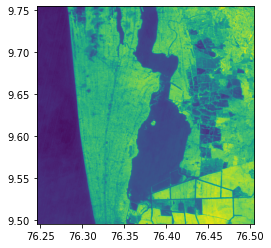

<AxesSubplot:>

In [36]:
output
show(output)

<AxesSubplot:>

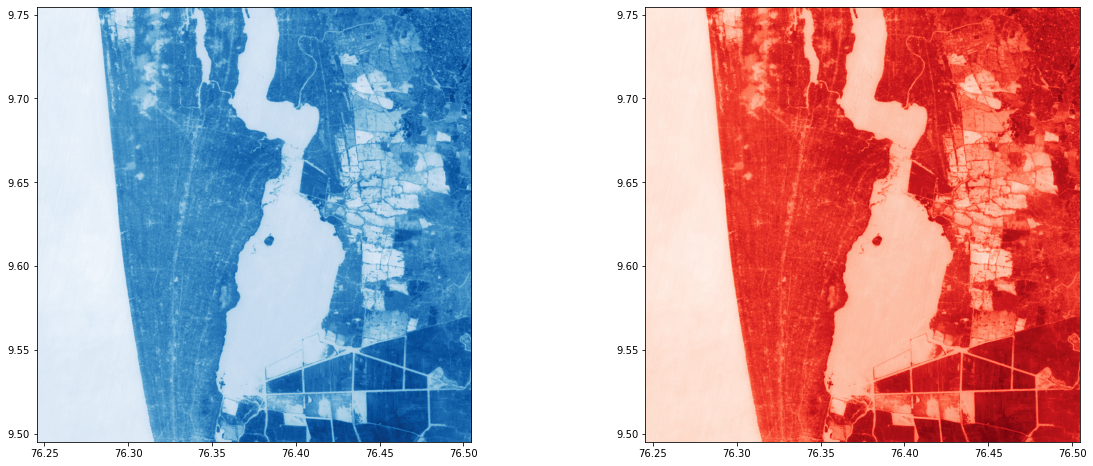

In [37]:
import matplotlib.pyplot as plt
fig,(axis1,ax2)=plt.subplots(1,2,figsize=(20,8))
show(output,ax=axis1,cmap='Blues')
show(output,ax=ax2,cmap='Reds')

In [38]:
#stack


In [39]:
lred=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B4.TIF")
lgreen=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B3.TIF")
lblue=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B2.TIF")
lNIR=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_B5.TIF")

In [40]:
path = r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\nikil\satelite\landsat08\landsat 8\LC08_L1TP_144053_20210214_20210304_01_T1\LC08_L1TP_144053_20210214_20210304_01_T1_"
files = [path+"B4.TIF",path+"B3.TIF",path+"B2.TIF",path+"B5.TIF"]
files

['C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B4.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B3.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B2.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B5.TIF']

In [41]:
files.sort()
files

['C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B2.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B3.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B4.TIF',
 'C:\\Users\\Ahammad Sahil\\Desktop\\SEM 2\\GA LAB\\nikil\\satelite\\landsat08\\landsat 8\\LC08_L1TP_144053_20210214_20210304_01_T1\\LC08_L1TP_144053_20210214_20210304_01_T1_B5.TIF']

In [42]:
src= rasterio.open(files[0])
src

<open DatasetReader name='C:/Users/Ahammad Sahil/Desktop/SEM 2/GA LAB/nikil/satelite/landsat08/landsat 8/LC08_L1TP_144053_20210214_20210304_01_T1/LC08_L1TP_144053_20210214_20210304_01_T1_B2.TIF' mode='r'>

In [43]:
meta = src.meta
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7561,
 'height': 7721,
 'count': 1,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(30.0, 0.0, 567885.0,
        0.0, -30.0, 1234815.0)}

In [44]:
meta.update(count=len(files))
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7561,
 'height': 7721,
 'count': 4,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(30.0, 0.0, 567885.0,
        0.0, -30.0, 1234815.0)}

In [70]:
savex=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA JUPTR_NB\anju\module_2b support\stack.tiff","w",**meta)
for i,layer in enumerate(files,start = 1):
    with rasterio.open(layer) as files:
        savex.write(files.read(1),i)
savex.close()

TypeError: 'DatasetReader' object is not iterable

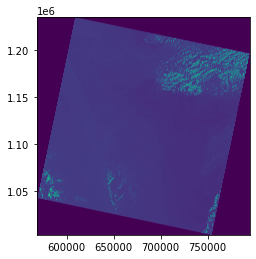

<AxesSubplot:>

In [46]:
show(lblue)

In [47]:
lred_c=lred.read().astype('float64') 
lred_c

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [48]:
lred_c.min()
lred_c.max()

64648.0

In [49]:
lgreen_c=lgreen.read().astype('float64') 
lgreen_c

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [50]:
lblue_c=lgreen.read().astype('float64') 
lblue_c

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [51]:
lnir_c=lNIR.read().astype('float64') 
lnir_c

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [52]:
from itertools import permutations
import torch

ModuleNotFoundError: No module named 'torch'

In [ ]:
#lgreen_c.squeeze().permute(1,2,0)

In [ ]:

plt.imshow(lgreen_c)

In [53]:
def normalize(array):
    array_min=array.min()
    array_max=array.max()
    return ((array-array_min)/(array_max-array_min))

In [54]:
red_n=normalize(lred_c)
green_n=normalize(lgreen_c)
blue_n=normalize(lblue_c)

In [55]:
out_meta = lred.meta.copy()
out_meta.update({"count":4})
out_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 7561,
 'height': 7721,
 'count': 4,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(30.0, 0.0, 567885.0,
        0.0, -30.0, 1234815.0)}

In [56]:
color_list=[red_n,green_n,blue_n]

In [59]:
savergb=rasterio.open(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA JUPTR_NB\anju\module_2b support\stacked_true.tiff","w",**out_meta)
for i,image_n in enumerate(color_list,1):
    savergb.write(image_n[0],i)
savergb.close()

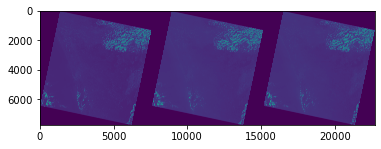

In [58]:
truecolor = np.dstack((red_n,green_n,blue_n))
plt.imshow(truecolor[0])